<a href="https://colab.research.google.com/github/emmapraise/Sentiment-Analysis/blob/master/Twitter_Sentiment_Analysis(Orignial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tweepy, nltk
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [0]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to punkt...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

access_token = 'xxxxxxxxxx-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [0]:
api = tweepy.API(auth)

In [0]:
qurey = 'Trump'
max_tweets = 1000

In [0]:
public_tweets = tweepy.Cursor(api.search, q= qurey).items(max_tweets)
tweet_sentiment = []

In [0]:
for tweet in public_tweets:
    if(tweet.lang == 'en') and (not tweet.retweeted) and ('RT @' not in tweet.text):
        tweets = tweet.text
        print(tweets)
        analysis = TextBlob(tweets, analyzer=NaiveBayesAnalyzer())
        print(analysis.sentiment)
        tweet_sentiment.append(analysis.sentiment.classification)

@Apple why does the “camera” to “edit photo” action lag with the updated version of iOS 13? #apple #iOS13 #iPhone12 #iOS
Sentiment(classification='pos', p_pos=0.9034961441918278, p_neg=0.09650385580817171)
#iphone12 #iphones #iphonelover #iOS 
see full rumors,leaks,specifications of iPhone 12
https://t.co/i1DtAI5Oh5
Sentiment(classification='pos', p_pos=0.930365239922267, p_neg=0.0696347600777319)
@hey_car_ 🎛⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️ ⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
iPhone12
Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)
🎛⬜⬜
⬜⬜⬜
⬜🍎⬜
⬜⬜⬜
⬜⬜⬜iPhone12
Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)
iphone12
Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)
iPhone 12 Concept Infinity Display/Full Screen
#iPhone #iPhone12 #iphone12promax #technews #technology https://t.co/QWjechULp8
Sentiment(classification='neg', p_pos=0.40890527556348494, p_neg=0.5910947244365146)
This week’s #Apple headlines; three key #iPhone12 leaks, the launch of the 16-inch

In [0]:
data = {'Tweet':tweet_sentiment}
data = pd.DataFrame(data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


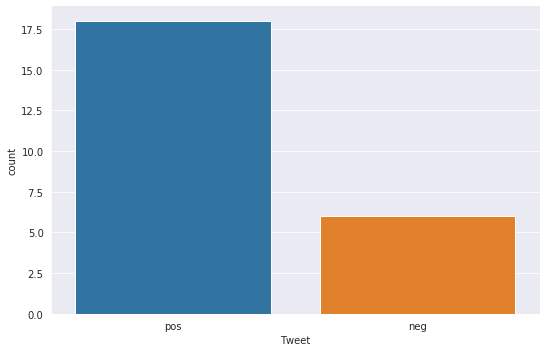

In [0]:
sns.set_style('darkgrid')
g = sns.factorplot(x='Tweet', data=data, aspect=1.5, kind="count")